<a href="https://colab.research.google.com/github/Sumin0411/SKTFlyAI/blob/main/06_CNN_multi_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 합성곱 신경망

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

170498071/170498071 [==============================] - 6s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

y_train.shape, y_test.shape

((50000,), (10000,))

In [4]:
y_train[:20]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6],
      dtype=uint8)

In [5]:
class_names = ['airplane', 'automoblie', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
samples = np.random.randint(50000, size=16)
samples

array([47920, 29015, 49165, 38447, 12077,  2370, 33374, 24860,  1243,
       18604,  4234, 22535,  3497, 13993, 13813, 24562])

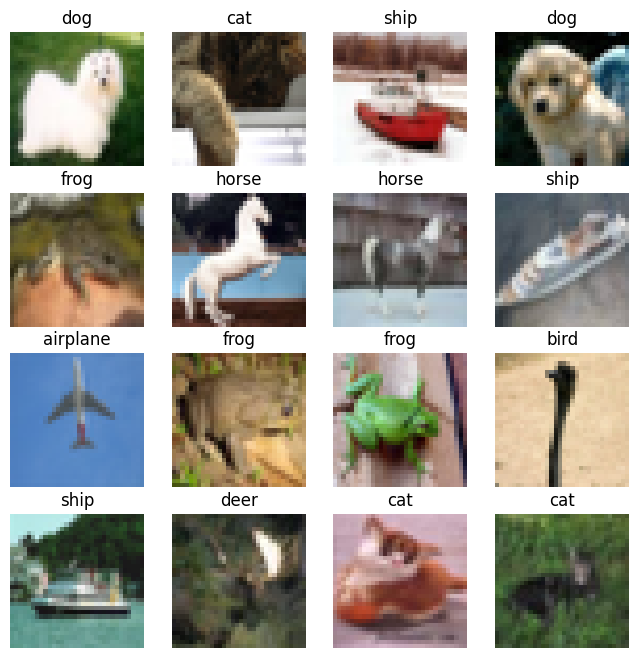

In [7]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
  plt.subplot(4, 4, 1+i)
  plt.imshow(X_train[idx], cmap='gray')
  plt.axis('off')
  plt.title(class_names[y_train[idx]])
plt.show()

### 검증용 데이터

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000,), (10000,))

### 정규화

In [9]:
X_train_s = X_train.astype('float32')/255.
X_val_s = X_val.astype('float32')/255.

### 원핫인코딩

In [10]:
np.max(X_train_s), np.min(X_train_s)

(1.0, 0.0)

In [11]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

y_train_o[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
# # CNN layer에는 3차원 데이터 입력 -> 이 데이터는 컬러이므로 흑백일 경우에만 reshape 처리를 한다.
# X_train_s = X_train_s.reshape(-1, 28, 28, 1)
# X_val_s = X_val_s.reshape(-1, 28, 28, 1)

### 2. 모델 만들기

In [13]:
X_train_s.shape

(40000, 32, 32, 3)

In [14]:
from keras import layers
model = keras.Sequential([
    layers.Conv2D(filters = 16, kernel_size = (3,3),input_shape = (32, 32, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters= 32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                7

### 모델 학습

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
EPOCHS = 10
BATCH_SIZE = 32

history = model.fit(
    X_train_s, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (X_val_s, y_val_o),
    verbose = 1
)

Epoch 1/10
1250/1250 [==============================] - 11s 5ms/step - loss: 1.5724 - accuracy: 0.4347 - val_loss: 1.3209 - val_accuracy: 0.5308
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2472 - accuracy: 0.5579 - val_loss: 1.1715 - val_accuracy: 0.5833
Epoch 3/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.1138 - accuracy: 0.6075 - val_loss: 1.0971 - val_accuracy: 0.6174
Epoch 4/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.0284 - accuracy: 0.6404 - val_loss: 1.0970 - val_accuracy: 0.6150
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9649 - accuracy: 0.6621 - val_loss: 1.0354 - val_accuracy: 0.6398
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9211 - accuracy: 0.6780 - val_loss: 1.0323 - val_accuracy: 0.6389
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8781 - accuracy: 0.6944 - val_loss: 0.9877 - val_accuracy

In [18]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.show()

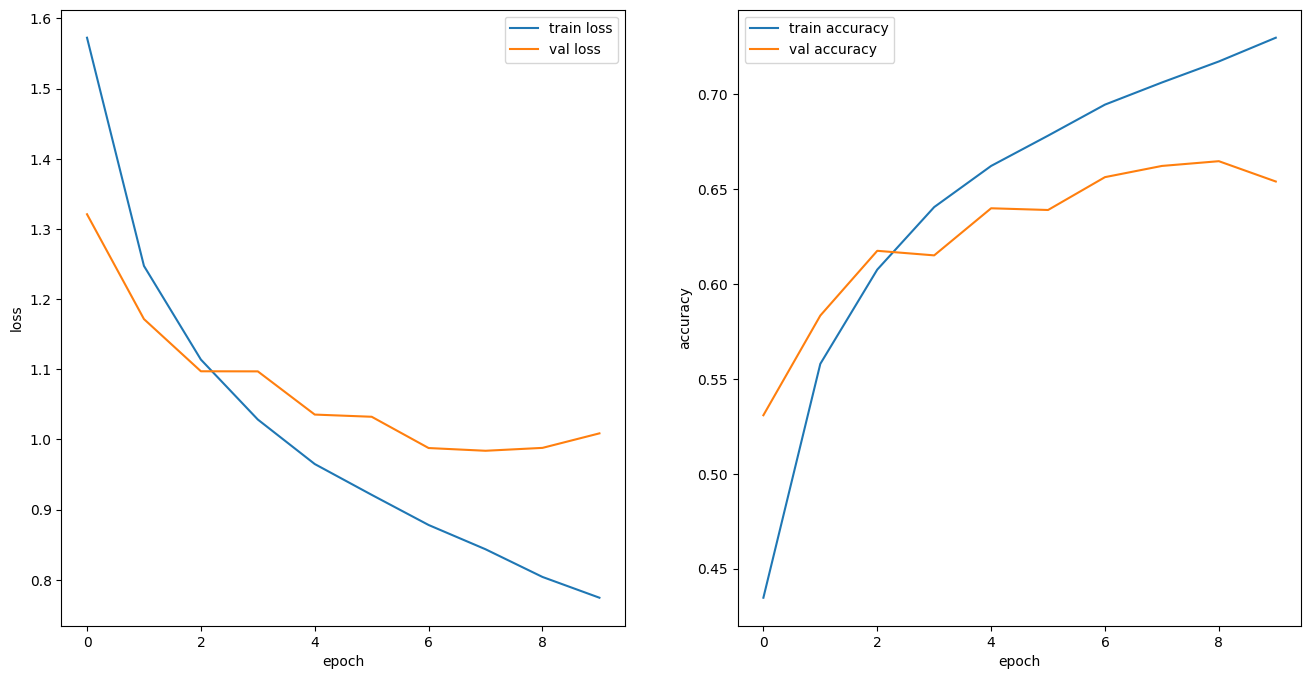

In [19]:
plot_history(history)

In [24]:
X_test_s = X_test.astype('float32')/255.
y_test_o = to_categorical(y_test)

In [25]:
model.evaluate(X_test_s, y_test_o)

313/313 [==============================] - 1s 3ms/step - loss: 1.0277 - accuracy: 0.6580


[1.0276696681976318, 0.6579999923706055]

### 4. DropOut layer 추가

In [31]:
def create_model_01():
  model = keras.Sequential([
      layers.Conv2D(filters = 16, kernel_size = (3,3),input_shape = (32, 32, 3), activation='relu'),
      layers.MaxPooling2D(pool_size=(2,2)),
      layers.Dropout(0.3),

      layers.Conv2D(filters= 32, kernel_size = (3,3), activation = 'relu'),
      layers.MaxPooling2D(pool_size=(2,2)),
      layers.Dropout(0.3),
      layers.Flatten(),
      layers.Dropout(0.3),
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.3),
      layers.Dense(10, activation='softmax')
  ])

  return model

In [34]:
model = create_model_01()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
EPOCHS = 10
BATCH_SIZE = 32

history = model.fit(
    X_train_s, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (X_val_s, y_val_o),
    verbose = 1

)

Epoch 1/10
1250/1250 [==============================] - 10s 6ms/step - loss: 1.8098 - accuracy: 0.3309 - val_loss: 1.4987 - val_accuracy: 0.4649
Epoch 2/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5393 - accuracy: 0.4387 - val_loss: 1.3775 - val_accuracy: 0.5178
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4539 - accuracy: 0.4702 - val_loss: 1.3362 - val_accuracy: 0.5290
Epoch 4/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4046 - accuracy: 0.4963 - val_loss: 1.2638 - val_accuracy: 0.5561
Epoch 5/10
1250/1250 [==============================] - 8s 7ms/step - loss: 1.3617 - accuracy: 0.5104 - val_loss: 1.2165 - val_accuracy: 0.5750
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3328 - accuracy: 0.5220 - val_loss: 1.2071 - val_accuracy: 0.5881
Epoch 7/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3139 - accuracy: 0.5307 - val_loss: 1.1597 - val_accuracy

### 5. 콜백
- EarlyStopping
- ModelCheckPoint
- ReduceLROnplateau

In [37]:
from keras import callbacks

ckpt_path = './ckpt/cifar10.ckpt'
ckpt_callback = callbacks.ModelCheckpoint(
    ckpt_path,
    monitor = 'val_loss', # 무엇을 통해 평가하여 하드디스크에 저장할지
    save_weights_only = True,
    save_best_only = True,
    verbose = 1
)

In [39]:
model = create_model_01()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
EPOCHS = 20
BATCH_SIZE = 32

history = model.fit(
    X_train_s, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (X_val_s, y_val_o),
    verbose = 1,
    callbacks = [ckpt_callback]
)

Epoch 1/20
1244/1250 [============================>.] - ETA: 0s - loss: 1.7959 - accuracy: 0.3367
Epoch 1: val_loss improved from inf to 1.50196, saving model to ./ckpt/cifar10.ckpt
1250/1250 [==============================] - 9s 6ms/step - loss: 1.7952 - accuracy: 0.3370 - val_loss: 1.5020 - val_accuracy: 0.4602
Epoch 2/20
1244/1250 [============================>.] - ETA: 0s - loss: 1.5386 - accuracy: 0.4407
Epoch 2: val_loss improved from 1.50196 to 1.36803, saving model to ./ckpt/cifar10.ckpt
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5379 - accuracy: 0.4409 - val_loss: 1.3680 - val_accuracy: 0.5215
Epoch 3/20
1246/1250 [============================>.] - ETA: 0s - loss: 1.4595 - accuracy: 0.4707
Epoch 3: val_loss improved from 1.36803 to 1.32195, saving model to ./ckpt/cifar10.ckpt
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4595 - accuracy: 0.4708 - val_loss: 1.3220 - val_accuracy: 0.5376
Epoch 4/20
1239/1250 [=========================

In [40]:
model.load_weights(ckpt_path) # 저장되어 있는 최선의 가중치를 모델에 업로드

In [41]:
model.evaluate(X_test_s, y_test_o)

313/313 [==============================] - 1s 3ms/step - loss: 1.0462 - accuracy: 0.6401


[1.0461525917053223, 0.6401000022888184]

* EarlyStopping

In [46]:
es_callback = callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 5
)

In [47]:
model = create_model_01()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
EPOCHS = 20
BATCH_SIZE = 32

history = model.fit(
    X_train_s, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (X_val_s, y_val_o),
    verbose = 1,
    callbacks = [ckpt_callback, es_callback]
)

Epoch 1/20
1240/1250 [============================>.] - ETA: 0s - loss: 1.7836 - accuracy: 0.3430
Epoch 1: val_loss did not improve from 1.03528
1250/1250 [==============================] - 8s 5ms/step - loss: 1.7815 - accuracy: 0.3438 - val_loss: 1.4655 - val_accuracy: 0.4754
Epoch 2/20
1245/1250 [============================>.] - ETA: 0s - loss: 1.5139 - accuracy: 0.4497
Epoch 2: val_loss did not improve from 1.03528
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5141 - accuracy: 0.4498 - val_loss: 1.3889 - val_accuracy: 0.5074
Epoch 3/20
1243/1250 [============================>.] - ETA: 0s - loss: 1.4307 - accuracy: 0.4845
Epoch 3: val_loss did not improve from 1.03528
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4309 - accuracy: 0.4843 - val_loss: 1.2655 - val_accuracy: 0.5534
Epoch 4/20
1247/1250 [============================>.] - ETA: 0s - loss: 1.3698 - accuracy: 0.5097
Epoch 4: val_loss did not improve from 1.03528
1250/1250 [==========

### RaduceLROnPlateau



In [50]:
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor = 'val_loss',
    patience = 3,
    factor = 0.2,
    verbose = 1,
    min_lr = 0.0001
)

In [51]:
model = create_model_01()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
EPOCHS = 20
BATCH_SIZE = 32

history = model.fit(
    X_train_s, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (X_val_s, y_val_o),
    verbose = 1,
    callbacks = [ckpt_callback, es_callback, reduce_lr]
)

Epoch 1/20
1247/1250 [============================>.] - ETA: 0s - loss: 1.7717 - accuracy: 0.3464
Epoch 1: val_loss did not improve from 0.98861
1250/1250 [==============================] - 8s 5ms/step - loss: 1.7714 - accuracy: 0.3464 - val_loss: 1.4489 - val_accuracy: 0.4883 - lr: 0.0010
Epoch 2/20
1245/1250 [============================>.] - ETA: 0s - loss: 1.5068 - accuracy: 0.4549
Epoch 2: val_loss did not improve from 0.98861
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5067 - accuracy: 0.4549 - val_loss: 1.3420 - val_accuracy: 0.5329 - lr: 0.0010
Epoch 3/20
1243/1250 [============================>.] - ETA: 0s - loss: 1.4140 - accuracy: 0.4927
Epoch 3: val_loss did not improve from 0.98861
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4139 - accuracy: 0.4927 - val_loss: 1.2506 - val_accuracy: 0.5821 - lr: 0.0010
Epoch 4/20
1243/1250 [============================>.] - ETA: 0s - loss: 1.3503 - accuracy: 0.5175
Epoch 4: val_loss did not imp

In [55]:
def create_model_02():
    model = keras.Sequential([
        layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),

        layers.Dense(16, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [56]:
model = create_model_02()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

EPOCHS = 20
BATCH_SIZE = 32

#
histroy = model.fit(
    X_train_s, y_train_o,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_s, y_val_o),
    callbacks=[ ckpt_callback, es_callback, reduce_lr],
    verbose=1
)

Epoch 1/20
1242/1250 [============================>.] - ETA: 0s - loss: 2.1025 - accuracy: 0.1900
Epoch 1: val_loss did not improve from 0.98681
1250/1250 [==============================] - 10s 6ms/step - loss: 2.1016 - accuracy: 0.1903 - val_loss: 1.8768 - val_accuracy: 0.2820 - lr: 0.0010
Epoch 2/20
1247/1250 [============================>.] - ETA: 0s - loss: 1.8540 - accuracy: 0.2749
Epoch 2: val_loss did not improve from 0.98681
1250/1250 [==============================] - 8s 6ms/step - loss: 1.8538 - accuracy: 0.2749 - val_loss: 1.7901 - val_accuracy: 0.3310 - lr: 0.0010
Epoch 3/20
1250/1250 [==============================] - ETA: 0s - loss: 1.7509 - accuracy: 0.3286
Epoch 3: val_loss did not improve from 0.98681
1250/1250 [==============================] - 7s 6ms/step - loss: 1.7509 - accuracy: 0.3286 - val_loss: 1.5835 - val_accuracy: 0.4299 - lr: 0.0010
Epoch 4/20
1247/1250 [============================>.] - ETA: 0s - loss: 1.6838 - accuracy: 0.3650
Epoch 4: val_loss did not im

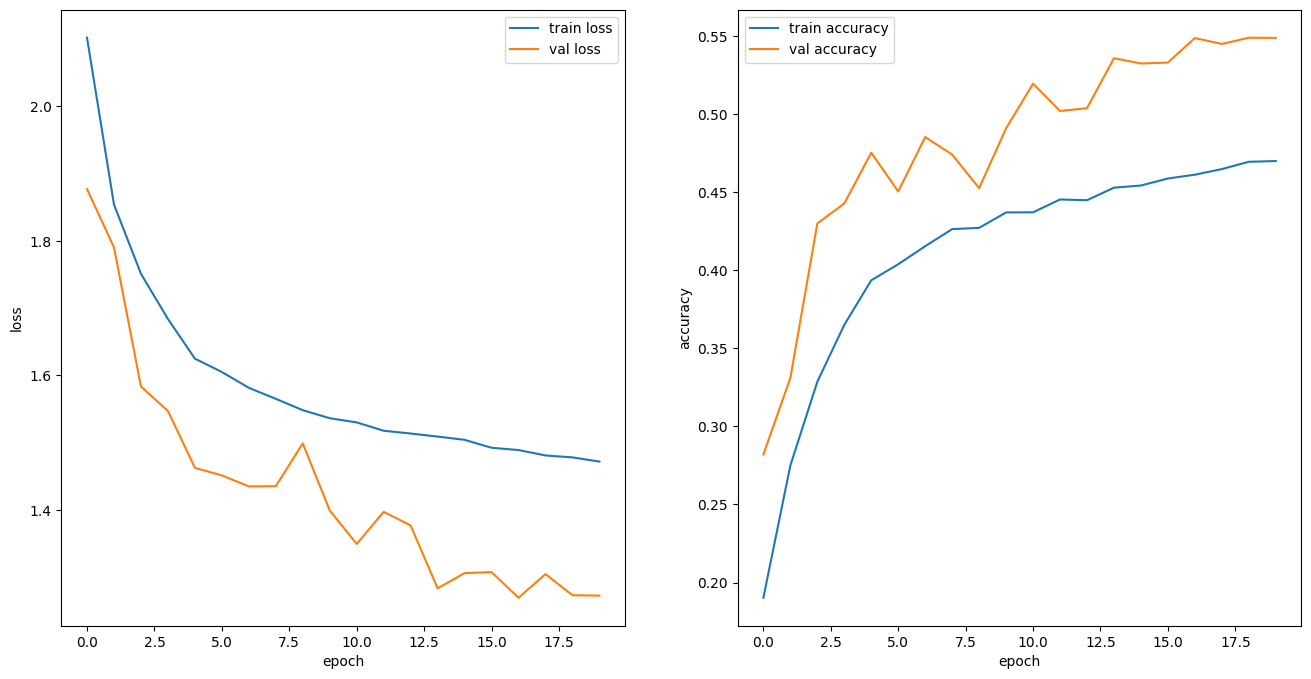

In [57]:
plot_history(histroy)